In [1]:
import sys
import os

project_root = os.path.abspath("..")
print(f"Project root: {project_root}")

# Add project_root to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# you may need to install the following packages
# pip install -U scikit-learn
# pip install scipy


Project root: E:\USA_PD_2024\Analysis\France_Feature_based


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from code_descriptors_postural_control.stabilogram.stato import Stabilogram
from code_descriptors_postural_control.descriptors import compute_all_features


In [109]:
forceplate_file_selected = r"E:\USA_PD_2024\Analysis\France_Feature_based\project\test.csv"

In [113]:
data_forceplatform = pd.read_csv(forceplate_file_selected, header=[31], sep=",", index_col=0)
data_forceplatform.head()

,MocapTime,DeviceFrame,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz
MocapFrame,,,,,,,,,,,
0,0.00,0,1.622131,-8.233887,581.4375,-37.412109,-12.184570,3.460205,0.020956,-0.064344,0.0
1,0.01,1,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.02,2,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.03,3,1.216919,-7.369629,582.3125,-38.582031,-12.597168,3.246948,0.021633,-0.066257,0.0
4,0.04,4,0.894653,-7.661621,582.3125,-38.800781,-12.507324,3.155640,0.021479,-0.066632,0.0


In [107]:
dft = data_forceplatform
X = dft.get(" My") / dft.get(" Fz")
Y = dft.get(" Mx") / dft.get(" Fz")
X = X - np.mean(X)
Y = Y - np.mean(Y)
X = 100 * X
Y = 100 * Y

X = X.to_numpy()[4000:7000]
Y = Y.to_numpy()[4000:7000]

TypeError: unsupported operand type(s) for /: 'NoneType' and 'NoneType'

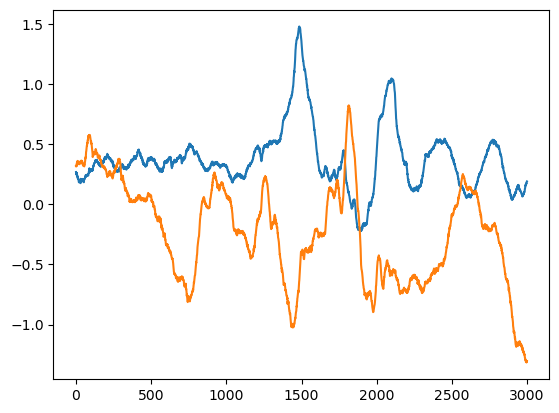

In [85]:
plt.plot(X)
plt.plot(Y)

In [87]:
data = np.array([X, Y]).T


In [89]:
valid_index = np.sum(np.isnan(data), axis=1) == 0
print(np.sum(valid_index), len(data))


3000 3000


In [91]:
stato = Stabilogram()
stato.from_array(array=data, original_frequency=100)

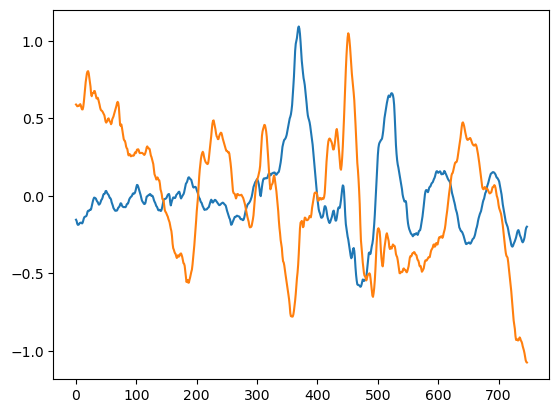

In [93]:
plt.plot(stato.medio_lateral)
plt.plot(stato.antero_posterior)

In [95]:
sway_density_radius = 0.3  # 3 mm

params_dic = {"sway_density_radius": sway_density_radius}

features = compute_all_features(stato, params_dic=params_dic)


In [61]:
features

{'mean_value_ML': 0.3740821161844198,
 'mean_value_AP': -0.23424815039801114,
 'mean_distance_ML': 0.17958109553112522,
 'mean_distance_AP': 0.34804323313894586,
 'mean_distance_Radius': 0.4254325412234754,
 'maximal_distance_ML': 1.0934116824820326,
 'maximal_distance_AP': 1.076085490398158,
 'maximal_distance_Radius': 1.171563852857063,
 'rms_ML': 0.26540984939429485,
 'rms_AP': 0.41648441647296885,
 'rms_Radius': 0.49386400690912036,
 'range_ML': 1.6807988285326032,
 'range_AP': 2.1256765044334687,
 'range_ML_AND_AP': 2.127255063910085,
 'range_ratio_ML_AND_AP': 0.7907124273270201,
 'planar_deviation_ML_AND_AP': 0.4938640069091203,
 'coefficient_sway_direction_ML_AND_AP': -0.2329489848929669,
 'confidence_ellipse_area_ML_AND_AP': 2.0369975463044163,
 'principal_sway_direction_ML_AND_AP': 13.280808808239504,
 'mean_velocity_ML': 0.3581913643625228,
 'mean_velocity_AP': 0.5203914302706961,
 'mean_velocity_ML_AND_AP': 0.6953667708089499,
 'sway_area_per_second_ML_AND_AP': 0.09587003176